### Import the Data


In [1]:
import pickle
import os
from feature_extractors.normal_feature_extractor import NormalFeatureExtractor
from feature_extractors.transformer_feature_extractor import TransformerFeatureExtractor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns


seed = 42

data = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_experiment_dataframe_clean_chunks.pkl', 'rb')).text.values.tolist()


### Extract features

In [2]:
if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_normal_chunks.pkl'):
    X_normal = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_normal_chunks.pkl', 'rb'))
else:
    normal_feature_extractor = NormalFeatureExtractor()
    normal_feature_extractor.fit(data)
    X_normal = normal_feature_extractor.transform(data, normalize=False)

if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_normal_chunks_normalized.pkl'):
    X_normal_normalized = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_normal_chunks_normalized.pkl', 'rb'))
else:
    normal_feature_extractor = NormalFeatureExtractor()
    normal_feature_extractor.fit(data)
    X_normal_normalized = normal_feature_extractor.transform(data, normalize=True)

if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bert_chunks.pkl'):
    X_bert = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bert_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('bert-base-uncased', 512)
    X_bert = transformer_feature_extractor.transform(data)

if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bert_fine_tuned_chunks.pkl'):
    X_bert_fine_tuned = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bert_fine_tuned_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('fine_tuned_models/out_of_domain_bert_base_clean_chunks', 512)
    X_bert_fine_tuned = transformer_feature_extractor.transform(data)

if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bert_large_chunks.pkl'):
    X_bert_large = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bert_large_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('bert-large-uncased', 512)
    X_bert_large = transformer_feature_extractor.transform(data)
    
if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bert_large_fine_tuned_chunks.pkl'):
    X_bert_large_fine_tuned = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bert_large_fine_tuned_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('fine_tuned_models/out_of_domain_bert_large_clean_chunks', 512)
    X_bert_large_fine_tuned = transformer_feature_extractor.transform(data)

if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_chunks.pkl'):
    X_bigbird = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('google/bigbird-roberta-base', 2048)
    X_bigbird = transformer_feature_extractor.transform(data)
    
if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_fine_tuned_chunks.pkl'):
    X_bigbird_fine_tuned = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_fine_tuned_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('fine_tuned_models/out_of_domain_bigbird_roberta_base_clean_chunks', 2048)
    X_bigbird_fine_tuned = transformer_feature_extractor.transform(data)

if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_short_chunks.pkl'):
    X_bigbird_short = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_short_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('google/bigbird-roberta-base', 512)
    X_bigbird_short = transformer_feature_extractor.transform(data)
    
if os.path.exists('/home/sergey/thesis/pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_fine_tuned_short_chunks.pkl'):
    X_bigbird_fine_tuned_short = pickle.load(open('/home/sergey/thesis/pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_fine_tuned_short_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('fine_tuned_models/out_of_domain_bigbird_roberta_base_clean_chunks', 512)
    X_bigbird_fine_tuned_short = transformer_feature_extractor.transform(data)

if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_long_chunks.pkl'):
    X_bigbird_long = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_long_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('google/bigbird-roberta-base', 4096) 
    X_bigbird_long = transformer_feature_extractor.transform(data)

if os.path.exists('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_fine_tuned_long_chunks.pkl'):
    X_bigbird_fine_tuned_long = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_X_bigbird_fine_tuned_long_chunks.pkl', 'rb'))
else:
    transformer_feature_extractor = TransformerFeatureExtractor('fine_tuned_models/out_of_domain_bigbird_roberta_base_clean_chunks', 4096)
    X_bigbird_fine_tuned_long = transformer_feature_extractor.transform(data)
    
y = pickle.load(open('pickles/pickled_datasets/seed_42/out_of_domain_y_chunks.pkl', 'rb'))
    

In [3]:
X_bert.shape

(37177, 768)

### Cross Validation

In [3]:
random.seed(seed)

k = 10

indices = [i for i in range(len(X_normal))]
random.shuffle(indices)

fold_indices = np.array_split(np.array(indices), k)

cv_accuracy_normal = []
cv_accuracy_normal_normalized = []
cv_accuracy_bert = []
cv_accuracy_bert_fine_tuned = []
cv_accuracy_bert_large = []
cv_accuracy_bert_large_fine_tuned = []
cv_accuracy_bigbird = []
cv_accuracy_bigbird_fine_tuned = []
cv_accuracy_bigbird_short = []
cv_accuracy_bigbird_fine_tuned_short = []
cv_accuracy_bigbird_long = []
cv_accuracy_bigbird_fine_tuned_long = []

confusion_matrices_normal = []
confusion_matrices_normal_normalized = []
confusion_matrices_bert = []
confusion_matrices_bert_fine_tuned = []
confusion_matrices_bert_large = []
confusion_matrices_bert_large_fine_tuned = []
confusion_matrices_bigbird = []
confusion_matrices_bigbird_fine_tuned = []
confusion_matrices_bigbird_short = []
confusion_matrices_bigbird_fine_tuned_short = []
confusion_matrices_bigbird_long = []
confusion_matrices_bigbird_fine_tuned_long = []

for i in tqdm(range(k), desc='Cross validation'):
    test_indices = fold_indices[i]
    train_indices = [index for index in indices if index not in test_indices]

    clf_normal = LogisticRegression(random_state=seed, max_iter=1000).fit(X_normal.iloc[train_indices,:], y[train_indices])
    clf_normal_normalized = LogisticRegression(random_state=seed, max_iter=1000).fit(X_normal_normalized.iloc[train_indices,:], y[train_indices])
    clf_bert = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bert[train_indices,:], y[train_indices])
    clf_bert_fine_tuned = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bert_fine_tuned[train_indices,:], y[train_indices])
    clf_bert_large = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bert_large[train_indices,:], y[train_indices])
    clf_bert_large_fine_tuned = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bert_large_fine_tuned[train_indices,:], y[train_indices])
    clf_bigbird = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bigbird[train_indices,:], y[train_indices])
    clf_bigbird_fine_tuned = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bigbird_fine_tuned[train_indices,:], y[train_indices])
    clf_bigbird_short = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bigbird_short[train_indices,:], y[train_indices])
    clf_bigbird_fine_tuned_short = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bigbird_fine_tuned_short[train_indices,:], y[train_indices])
    clf_bigbird_long = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bigbird_long[train_indices,:], y[train_indices])
    clf_bigbird_fine_tuned_long = LogisticRegression(random_state=seed, max_iter=1000).fit(X_bigbird_fine_tuned_long[train_indices,:], y[train_indices])
    
    preds_normal = clf_normal.predict(X_normal.iloc[test_indices,:])
    preds_normal_normalized = clf_normal_normalized.predict(X_normal_normalized.iloc[test_indices,:])
    preds_bert = clf_bert.predict(X_bert[test_indices,:])
    preds_bert_fine_tuned = clf_bert_fine_tuned.predict(X_bert_fine_tuned[test_indices,:])
    preds_bert_large = clf_bert_large.predict(X_bert_large[test_indices,:])
    preds_bert_large_fine_tuned = clf_bert_large_fine_tuned.predict(X_bert_large_fine_tuned[test_indices,:])
    preds_bigbird = clf_bigbird.predict(X_bigbird[test_indices,:])
    preds_bigbird_fine_tuned = clf_bigbird_fine_tuned.predict(X_bigbird_fine_tuned[test_indices,:])
    preds_bigbird_short = clf_bigbird_short.predict(X_bigbird_short[test_indices,:])
    preds_bigbird_fine_tuned_short = clf_bigbird_fine_tuned_short.predict(X_bigbird_fine_tuned_short[test_indices,:])
    preds_bigbird_long = clf_bigbird_long.predict(X_bigbird_long[test_indices,:])
    preds_bigbird_fine_tuned_long = clf_bigbird_fine_tuned_long.predict(X_bigbird_fine_tuned_long[test_indices,:])

    cv_accuracy_normal.append(accuracy_score(y[test_indices], preds_normal))
    cv_accuracy_normal_normalized.append(accuracy_score(y[test_indices], preds_normal_normalized))
    cv_accuracy_bert.append(accuracy_score(y[test_indices], preds_bert))
    cv_accuracy_bert_fine_tuned.append(accuracy_score(y[test_indices], preds_bert_fine_tuned))
    cv_accuracy_bert_large.append(accuracy_score(y[test_indices], preds_bert_large))
    cv_accuracy_bert_large_fine_tuned.append(accuracy_score(y[test_indices], preds_bert_large_fine_tuned))
    cv_accuracy_bigbird.append(accuracy_score(y[test_indices], preds_bigbird))
    cv_accuracy_bigbird_fine_tuned.append(accuracy_score(y[test_indices], preds_bigbird_fine_tuned))
    cv_accuracy_bigbird_short.append(accuracy_score(y[test_indices], preds_bigbird_short))
    cv_accuracy_bigbird_fine_tuned_short.append(accuracy_score(y[test_indices], preds_bigbird_fine_tuned_short))
    cv_accuracy_bigbird_long.append(accuracy_score(y[test_indices], preds_bigbird_long))
    cv_accuracy_bigbird_fine_tuned_long.append(accuracy_score(y[test_indices], preds_bigbird_fine_tuned_long))

    confusion_matrices_normal.append(confusion_matrix(y[test_indices], preds_normal))
    confusion_matrices_normal_normalized.append(confusion_matrix(y[test_indices], preds_normal_normalized))
    confusion_matrices_bert.append(confusion_matrix(y[test_indices], preds_bert))
    confusion_matrices_bert_fine_tuned.append(confusion_matrix(y[test_indices], preds_bert_fine_tuned))
    confusion_matrices_bert_large.append(confusion_matrix(y[test_indices], preds_bert_large))
    confusion_matrices_bert_large_fine_tuned.append(confusion_matrix(y[test_indices], preds_bert_large_fine_tuned))
    confusion_matrices_bigbird.append(confusion_matrix(y[test_indices], preds_bigbird))
    confusion_matrices_bigbird_fine_tuned.append(confusion_matrix(y[test_indices], preds_bigbird_fine_tuned))
    confusion_matrices_bigbird_short.append(confusion_matrix(y[test_indices], preds_bigbird_short))
    confusion_matrices_bigbird_fine_tuned_short.append(confusion_matrix(y[test_indices], preds_bigbird_fine_tuned_short))    
    confusion_matrices_bigbird_long.append(confusion_matrix(y[test_indices], preds_bigbird_long))
    confusion_matrices_bigbird_fine_tuned_long.append(confusion_matrix(y[test_indices], preds_bigbird_fine_tuned_long))

Cross validation:   0%|          | 0/10 [00:00<?, ?it/s]

#### Pickle Results

In [43]:
with open('pickles/results/experiment_main/cv_accuracy_normal_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_normal, f)
with open('pickles/results/experiment_main/cv_accuracy_normal_normalized_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_normal_normalized, f)  
with open('pickles/results/experiment_main/cv_accuracy_bert_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bert, f)
with open('pickles/results/experiment_main/cv_accuracy_bert_fine_tuned_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bert_fine_tuned, f)  
with open('pickles/results/experiment_main/cv_accuracy_bert_large_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bert_large, f)
with open('pickles/results/experiment_main/cv_accuracy_bert_large_fine_tuned_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bert_large_fine_tuned, f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bigbird, f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bigbird_fine_tuned, f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_short_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bigbird_short, f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_short_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bigbird_fine_tuned_short, f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_long_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bigbird_long, f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_long_chunks.pkl', 'wb') as f:
    pickle.dump(cv_accuracy_bigbird_fine_tuned_long, f)

with open('pickles/results/experiment_main/confusion_matrices_normal_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_normal, f)
with open('pickles/results/experiment_main/confusion_matrices_normal_normalized_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_normal_normalized, f)
with open('pickles/results/experiment_main/confusion_matrices_bert_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bert, f)    
with open('pickles/results/experiment_main/confusion_matrices_bert_fine_tuned_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bert_fine_tuned, f)
with open('pickles/results/experiment_main/confusion_matrices_bert_large_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bert_large, f)
with open('pickles/results/experiment_main/confusion_matrices_bert_large_fine_tuned_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bert_large_fine_tuned, f)
with open('pickles/results/experiment_main/confusion_matrices_bigbird_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bigbird, f)
with open('pickles/results/experiment_main/confusion_matrices_bigbird_fine_tuned_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bigbird_fine_tuned, f)
with open('pickles/results/experiment_main/confusion_matrices_bigbird_short_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bigbird_short, f)
with open('pickles/results/experiment_main/confusion_matrices_bigbird_fine_tuned_short_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bigbird_fine_tuned_short, f)
with open('pickles/results/experiment_main/confusion_matrices_bigbird_long_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bigbird_long, f)
with open('pickles/results/experiment_main/confusion_matrices_bigbird_fine_tuned_long_chunks.pkl', 'wb') as f:
    pickle.dump(confusion_matrices_bigbird_fine_tuned_long, f)

### Evaluate Classifiers

#### Average CV Accuracies per Classifier

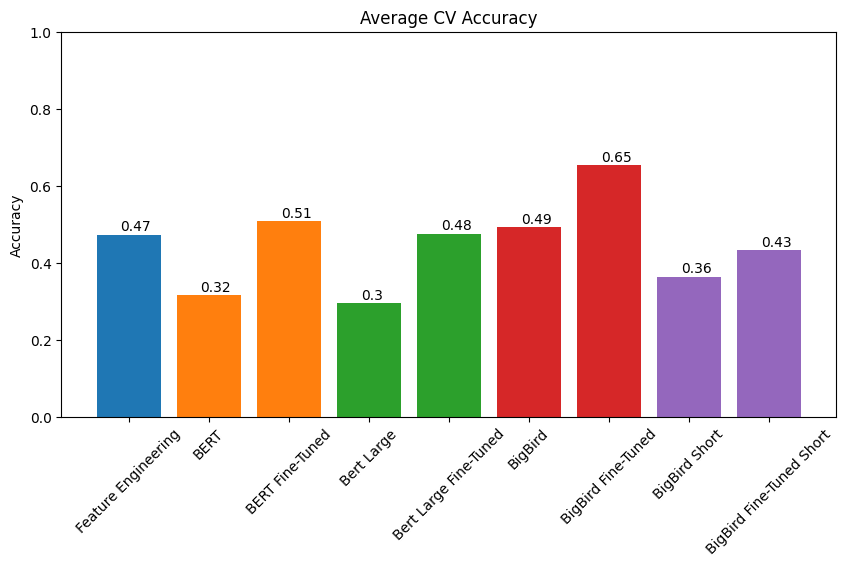

In [5]:

# Plot a bar chart with the accuracies of each model, each model should have its own bar and color. The fine-tuned models should be a slightly lighter shade.
plt.figure(figsize=(10, 5))
plt.bar(['Feature Engineering', 'BERT', 'BERT Fine-Tuned', 'Bert Large', 'Bert Large Fine-Tuned', 'BigBird', 'BigBird Fine-Tuned', 'BigBird Short', 'BigBird Fine-Tuned Short', 'BigBird Long', 'BigBird Fine-Tuned Long'],
        [np.mean(cv_accuracy_normal), np.mean(cv_accuracy_bert), np.mean(cv_accuracy_bert_fine_tuned), np.mean(cv_accuracy_bert_large), np.mean(cv_accuracy_bert_large_fine_tuned),
          np.mean(cv_accuracy_bigbird), np.mean(cv_accuracy_bigbird_fine_tuned), np.mean(cv_accuracy_bigbird_short), np.mean(cv_accuracy_bigbird_fine_tuned_short), np.mean(cv_accuracy_bigbird_long), np.mean(cv_accuracy_bigbird_fine_tuned_long)],
        color=['#1f77b4', '#ff7f0e', '#ff7f0e', '#2ca02c', '#2ca02c', '#d62728', '#d62728', '#9467bd', '#9467bd', '#8c564b', '#8c564b'])

plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Average CV Accuracy')

# add the accuracy values to the bars
for i, v in enumerate([np.mean(cv_accuracy_normal), np.mean(cv_accuracy_bert), np.mean(cv_accuracy_bert_fine_tuned), 
                       np.mean(cv_accuracy_bert_large), np.mean(cv_accuracy_bert_large_fine_tuned),
                         np.mean(cv_accuracy_bigbird), np.mean(cv_accuracy_bigbird_fine_tuned),
                         np.mean(cv_accuracy_bigbird_short), np.mean(cv_accuracy_bigbird_fine_tuned_short),
                         np.mean(cv_accuracy_bigbird_long), np.mean(cv_accuracy_bigbird_fine_tuned_long)]):
    plt.text(i - 0.1, v + 0.01, str(round(v, 2)))



#### Confusion Matrices

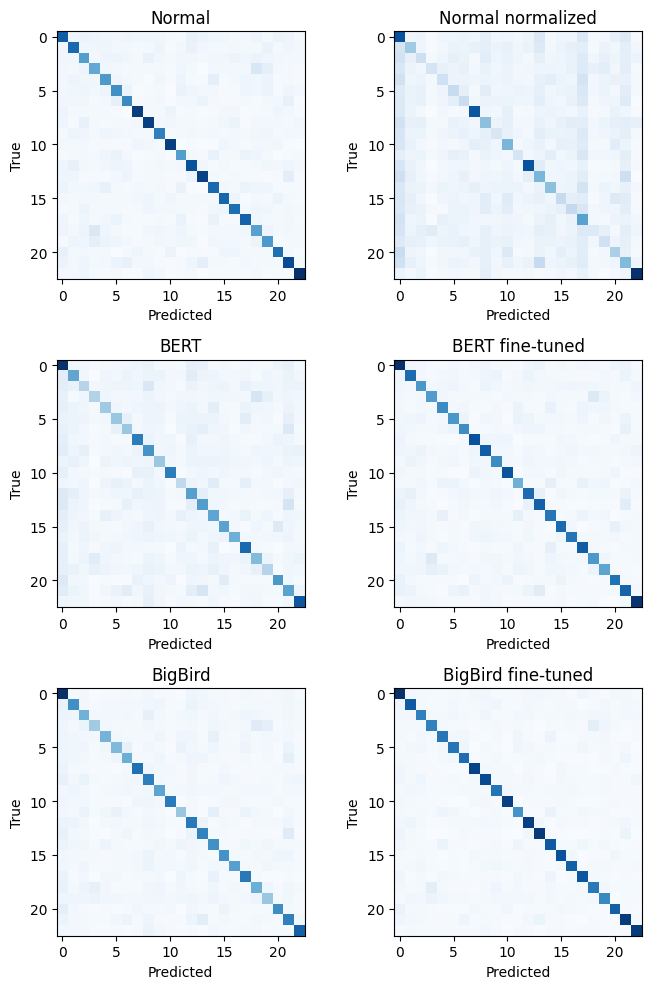

In [53]:
sum_confusion_matrices_normal = np.sum(confusion_matrices_normal, axis=0)
sum_confusion_matrices_normal_normalized = np.sum(confusion_matrices_normal_normalized, axis=0)
sum_confusion_matrices_bert = np.sum(confusion_matrices_bert, axis=0)
sum_confusion_matrices_bert_fine_tuned = np.sum(confusion_matrices_bert_fine_tuned, axis=0)
sum_confusion_matrices_bigbird = np.sum(confusion_matrices_bigbird, axis=0)
sum_confusion_matrices_bigbird_fine_tuned = np.sum(confusion_matrices_bigbird_fine_tuned, axis=0)

# plot the confusion matrices
fig, ax = plt.subplots(3, 2, figsize=(7, 10))
for i, matrix in enumerate([sum_confusion_matrices_normal, sum_confusion_matrices_normal_normalized, sum_confusion_matrices_bert, sum_confusion_matrices_bert_fine_tuned, sum_confusion_matrices_bigbird, sum_confusion_matrices_bigbird_fine_tuned]):
    ax[i//2, i%2].imshow(matrix, cmap=plt.cm.Blues)
    ax[i//2, i%2].set_title(['Normal', 'Normal normalized', 'BERT', 'BERT fine-tuned', 'BigBird', 'BigBird fine-tuned'][i])
    ax[i//2, i%2].set_xlabel('Predicted')
    ax[i//2, i%2].set_ylabel('True')
    
plt.tight_layout()

In [2]:
# load results

with open('pickles/results/experiment_main/cv_accuracy_normal_chunks.pkl', 'rb') as f:
    cv_accuracy_normal = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_normal_normalized_chunks.pkl', 'rb') as f:
    cv_accuracy_normal_normalized = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bert_chunks.pkl', 'rb') as f:
    cv_accuracy_bert = pickle.load(f) 
with open('pickles/results/experiment_main/cv_accuracy_bert_fine_tuned_chunks.pkl', 'rb') as f:
    cv_accuracy_bert_fine_tuned = pickle.load(f) 
with open('pickles/results/experiment_main/cv_accuracy_bert_large_chunks.pkl', 'rb') as f:
    cv_accuracy_bert_large = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bert_large_fine_tuned_chunks.pkl', 'rb') as f: 
    cv_accuracy_bert_large_fine_tuned = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird = pickle.load(f) 
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_fine_tuned = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_short_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_short = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_short_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_fine_tuned_short = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_long_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_long = pickle.load(f)
with open('pickles/results/experiment_main/cv_accuracy_bigbird_fine_tuned_long_chunks.pkl', 'rb') as f:
    cv_accuracy_bigbird_fine_tuned_long = pickle.load(f)